# Load and Explore Data
The aim of this notebook is to download the FashionMNIST dataset and to show some example images.
## 1. Imports

In [1]:
import torch
from torchvision import transforms, datasets

from utils.custom_dataset import CustomFashionMNISTDataset
from utils.visualize import visualize_sample

## 2. Download the FashionMNIST Dataset

In [2]:
%%time
# prepare dataset for the EfficientNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))  
])

# download dataset
full_train_dataset = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="data", train=False, download=True, transform=transform)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:00<00:00, 27.2MB/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 729kB/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:01<00:00, 2.92MB/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<?, ?B/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw

CPU times: total: 203 ms
Wall time: 25.5 s


In [3]:
%%time
# extract data and labels
data = [full_train_dataset[i][0] for i in range(len(full_train_dataset))]
labels = [full_train_dataset[i][1] for i in range(len(full_train_dataset))]

CPU times: total: 5.91 s
Wall time: 56.8 s


In [4]:
%%time
# save data and labels for faster loading
torch.save((data, labels), "data/fashion_mnist_dataset.pt")
print("Saved data and labels. ")

Saved data and labels. 
CPU times: total: 2.66 s
Wall time: 10.4 s


## 3. Show Example Images

In [5]:
# turn data and labels into a dataset format
train_data = CustomFashionMNISTDataset(data, labels)
print(f"Size of the training set: {len(train_data)}")

Size of the training set: 60000


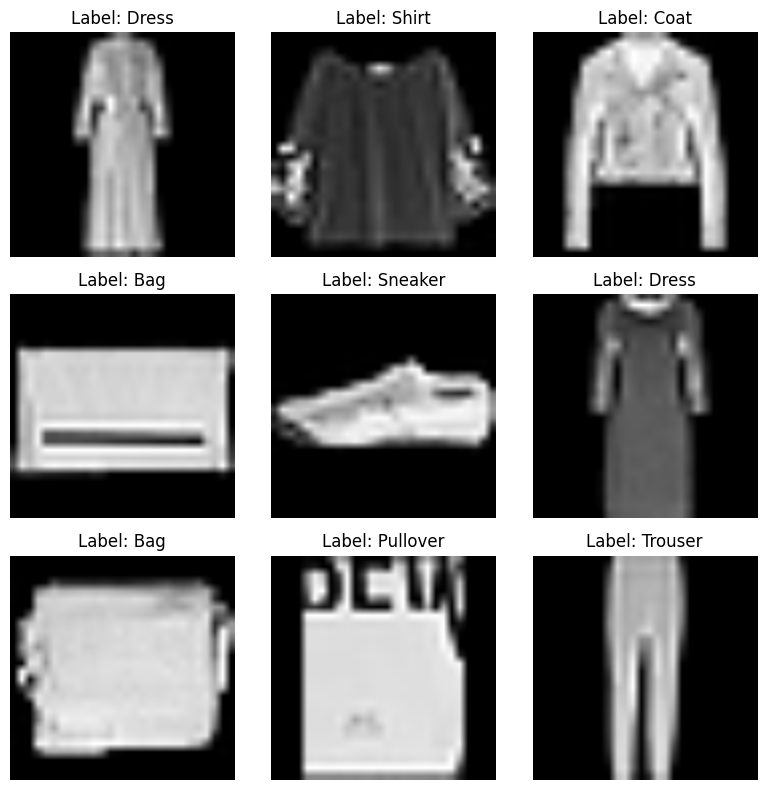

In [6]:
# show example images
visualize_sample(train_data)